In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

# StringDALE

> String Diagram Agent Language Express (StringDale) is a library for building complex LLM agentic workflows easily using [string diagrams](https://julesh.com/the-art-of-string-diagrams/).

## Motivation

We found current agentic frameworks unnecessarily complex:

* Too many levels of abstractions and boilerplate code.
* Too many interfaces to learn
* To many wrappers to build for our code to fit these frameworks

As a response, we create stringdale which aims to:

* Have a small interface -  making it easier to learn.
* Non-intrusive - You can use your own functions in stringdale, without fitting them to a complex interface.
* Have few levels of abstraction - we don't create tons of wrappers you have to navigate, you bring your own functions and understand exactly what is happening at all times.
* Make tracing and debugging simple.

## Installation


```bash
# in an environment with python>=3.10
pip install stringdale
```

`stringdale` uses [graphviz](https://graphviz.org) to draw your diagrams in jupyter notebooks.

Make sure you [download and install](https://graphviz.org/download/) graphviz on your system if you want diagrams to be rendered.

## Usage

Lets look at how to build a RAG workflow

In [ ]:
#| hide
from stringdale.core import load_env,get_git_root

In [ ]:
#| hide
load_env(get_git_root()/'.env.dev')

True

In [ ]:
# bring your own LLM based functions
# These can be any function or callable
# for now lets use example ones
from stringdale.chat import Chat
from stringdale.db import ChromaClient


Lets make an example vector db:

In [ ]:
chroma_client = ChromaClient()

dog_docs = [
    {
        'id': 'dog1',
        'text': 'The Golden Retriever is a friendly, intelligent breed known for its golden coat. They make excellent family pets and are great with children.',
        'metadata': {'breed': 'Golden Retriever'}
    },
    {
        'id': 'dog2', 
        'text': 'German Shepherds are loyal, protective dogs often used in police work. They are highly trainable and good at various tasks.',
        'metadata': {'breed': 'German Shepherd'}
    },
    {
        'id': 'dog3',
        'text': 'The Golden Retriever is a friendly, intelligent breed with a beautiful golden coat. They are wonderful family pets that get along well with kids.',
        'metadata': {'breed': 'Golden Retriever'}  
    },
    {
        'id': 'dog4',
        'text': 'Huskies are energetic working dogs bred for cold climates. They have thick fur and often blue eyes.',
        'metadata': {'breed': 'Husky'}
    },
    {
        'id': 'dog5',
        'text': 'Siberian Huskies are active working dogs that thrive in cold weather. They are known for their thick coats and striking blue eyes.',
        'metadata': {'breed': 'Husky'} 
    }
]

chroma_client.add_collection("dog_docs",exists_ok=True)
chroma_client.upsert(collection_name="dog_docs",docs=dog_docs)
chroma_client.list(collection_name='dog_docs')

[{'id': 'dog1',
  'text': 'The Golden Retriever is a friendly, intelligent breed known for its golden coat. They make excellent family pets and are great with children.',
  'metadata': {'breed': 'Golden Retriever'},
  'embedding': array([0.05813659, 0.02785078, 0.00372152, ..., 0.0241031 , 0.04067278,
         0.00027733])},
 {'id': 'dog2',
  'text': 'German Shepherds are loyal, protective dogs often used in police work. They are highly trainable and good at various tasks.',
  'metadata': {'breed': 'German Shepherd'},
  'embedding': array([ 0.03066194,  0.00074497,  0.01366658, ..., -0.0081617 ,
         -0.02541033, -0.01031713])},
 {'id': 'dog3',
  'text': 'The Golden Retriever is a friendly, intelligent breed with a beautiful golden coat. They are wonderful family pets that get along well with kids.',
  'metadata': {'breed': 'Golden Retriever'},
  'embedding': array([0.04065013, 0.02587523, 0.01385626, ..., 0.02761683, 0.03554016,
         0.00553581])},
 {'id': 'dog4',
  'text': 'H

In [ ]:
rag_chat = Chat(
    model='gpt-4o-mini',
    messages=[
        {'role':'system','content':'''
            You are a helpful assistant that answers questions about dogs.
            I found the following documents that may be relevant to the user's question:
            {% for doc in docs %}
            {{doc['text']}}
            {% endfor %}
            '''},
        {'role':'user','content':'{{question}}'},
    ]
)

In [ ]:
# import the basic building blocks
from stringdale import V,E,Define

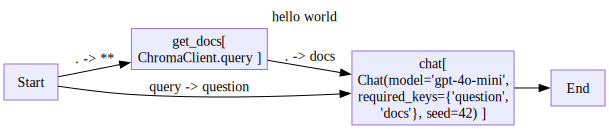

In [ ]:
# define your diagram schema
with Define('hello world') as RAG:
    V('get_docs',chroma_client.query)
    E('Start->get_docs(**)')
        
    V('chat',rag_chat)
    E('get_docs->chat(docs=.)')
    E('Start->chat(question=query)')
    E('chat->End')

RAG.draw()

In [ ]:
# run the diagram
diagram = RAG()

diagram_input = {
    'query':'tell me some stuff about golden retrievers',
    'collection_name':'dog_docs',
    'k':2
}

for trace in diagram.run(diagram_input):
    # you can write any logging,tracing logic here
    trace.pprint(file='log_file.txt')
    pass

# after running, access the output 
diagram.output

{'role': 'assistant',
 'content': 'The Golden Retriever is a friendly and intelligent breed known for its beautiful golden coat. They make excellent family pets and are particularly good with children, making them wonderful companions for families.',
 'meta': {'input_tokens': 198, 'output_tokens': 42}}

In [ ]:
! cat log_file.txt
! rm log_file.txt

Node Start:
{ 'input': { 'collection_name': 'dog_docs',
             'k': 2,
             'q': 'tell me some stuff about golden retrievers'},
  'output': { 'collection_name': 'dog_docs',
              'k': 2,
              'q': 'tell me some stuff about golden retrievers'}}
Node Start:
{ 'input': { 'collection_name': 'dog_docs',
             'k': 2,
             'query': 'tell me some stuff about golden retrievers'},
  'output': { 'collection_name': 'dog_docs',
              'k': 2,
              'query': 'tell me some stuff about golden retrievers'}}
Node get_docs:
{ 'input': { 'collection_name': 'dog_docs',
             'k': 2,
             'query': 'tell me some stuff about golden retrievers'},
  'output': [ { 'distance': 0.6993070840835571,
                'id': 'dog3',
                'metadata': {'breed': 'Golden Retriever'},
                'text': 'The Golden Retriever is a friendly, intelligent breed '
                        'with a beautiful golden coat. They are wonderful '

## Reporting Bugs

Found bugs? Missing features?
Feel free to [open an issue](https://github.com/DeanLight/stringdale/issues)

## Contributing

Want to contribute to stringdale? Great!
Feel free to submit a PR or discuss a feature you would like to add in the Issues.

To get a working development environment:

```bash
# clone the repo
git clone https://github.com/DeanLight/stringdale.git    
cd stringdale

# install stringdale in editable dev mode
pip install -e ".[dev]"

# run pre-commit to install commit hooks
pre-commit install

```
`stringdale` is developed using [nbdev](https://nbdev.fast.ai/)

```bash
# Make changes under nbs/ directory
# ...

# clean and export notebooks into a python library
nbdev_clean && nbdev_export

# make sure tests pass
nbdev_test

# Changing the docs? make sure that they are rendering correctly
nbdev_docs
```